In [1]:
# ====== IMPORTING MODULES
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import os
import cv2
# import pydic
import sys
sys.path.append('../../')
import pydic

%matplotlib ipympl

# TD9 - Strain field computation using DIC
## First DIC analyze

the steps are :
1. Set the parameters for DIC analysis
2. Load 2 images (reference and deformed)
3. Defined the Region of Interest (ROI)
4. Run the DIC analysis
5. Display the resulting displacement field
6. Postprocess the displacement field to compute the strain field

### Set the parameters for DIC analysis

In [2]:
#  ====== RUN PYDIC TO COMPUTE DISPLACEMENT AND STRAIN FIELDS (STRUCTURED GRID)
correl_wind_size = (80,80) # the size in pixel of the correlation windows
correl_grid_size = (20,20) # the size in pixel of the interval (dx,dy) of the correlation grid

### Load 2 images ans set the ROI

In [3]:
# read image series and write a separated result file 
pydic.init('./beton/*.tif', correl_wind_size, correl_grid_size, "result.dic")

please pick your area of intersest on the picture
reading image 1 / 8 : "./beton\Beton_002.tif"
reading image 2 / 8 : "./beton\Beton_003.tif"
reading image 3 / 8 : "./beton\Beton_004.tif"
reading image 4 / 8 : "./beton\Beton_005.tif"
reading image 5 / 8 : "./beton\Beton_006.tif"
reading image 6 / 8 : "./beton\Beton_007.tif"
reading image 7 / 8 : "./beton\Beton_008.tif"


### Run the DIC analysis

the read_dic_file is a simple wrapper function that allows to parse a dic file (given by the init() function) and compute the strain fields. The displacement fields can be smoothed thanks to many interpolation methods. A good interpolation method to do this job is the 'spline' method. After this process, note that a new folder named 'pydic' is created into the image directory where different results files are written.

These results are :

- 'disp' that contains images where the displacement of the correlation windows are highlighted. You can apply a scale to amplify these displacements.
- 'grid' that contains images where the correlation grid is highlighted. You can apply a scale to amplify the strain of this grid.
- 'marker' that contains images where the displacement of corraleted markers are highlighted
- 'result' where you can find raw text file (csv format) that constain the computed displacement and strain fields of each picture.
required argument:
the first arg 'result_file' must be a result file given by the init() function
optional named arguments ;
- 'interpolation' the allowed vals are 'raw', 'spline', 'linear', 'delaunnay', 'cubic', etc...
a good value is 'raw' (for no interpolation) or spline that smooth your data.

- 'save_image ' is True or False. Here you can choose if you want to save the 'disp', 'grid' and
- 'marker' result images

- 'scale_disp' is the scale (a float) that allows to amplify the displacement of the 'disp' images
- 'scale_grid' is the scale (a float) that allows to amplify the 'grid' images
- 'meta_info_file' is the path to a meta info file. A meta info file is a simple csv file
that contains some additional data for each pictures such as time or load values.

- 'strain_type' should be 'cauchy' '2nd_order' or 'log'. Default value is cauchy (or engineering) strains. You
can switch to log or 2nd order strain if you expect high strains.

- 'rm_rigid_body_transform' for removing rigid body displacement (default is true)

In [ ]:
# and read the result file for computing strain and displacement field from the result file 
pydic.read_dic_file('result.dic', interpolation='raw', strain_type='cauchy', save_image=True, scale_disp=10, scale_grid=25)


compute displacement and strain field of ./beton\Beton_001.tif ...
remove rigid body transform
interpolate displacement with raw method
saving ./beton/pydic/marker/Beton_001_marker.png file...
saving ./beton/pydic/disp/Beton_001_disp.png file...
saving ./beton/pydic/grid/Beton_001_grid.png file...
saving ./beton/pydic/result/Beton_001_result.csv file...
compute displacement and strain field of ./beton\Beton_002.tif ...
remove rigid body transform
interpolate displacement with raw method
saving ./beton/pydic/marker/Beton_002_marker.png file...
saving ./beton/pydic/disp/Beton_002_disp.png file...
saving ./beton/pydic/grid/Beton_002_grid.png file...
saving ./beton/pydic/result/Beton_002_result.csv file...
compute displacement and strain field of ./beton\Beton_003.tif ...
remove rigid body transform
interpolate displacement with raw method
saving ./beton/pydic/marker/Beton_003_marker.png file...
saving ./beton/pydic/disp/Beton_003_disp.png file...
saving ./beton/pydic/grid/Beton_003_grid.p

IndexError: list index out of range

### Post process the displacement field 

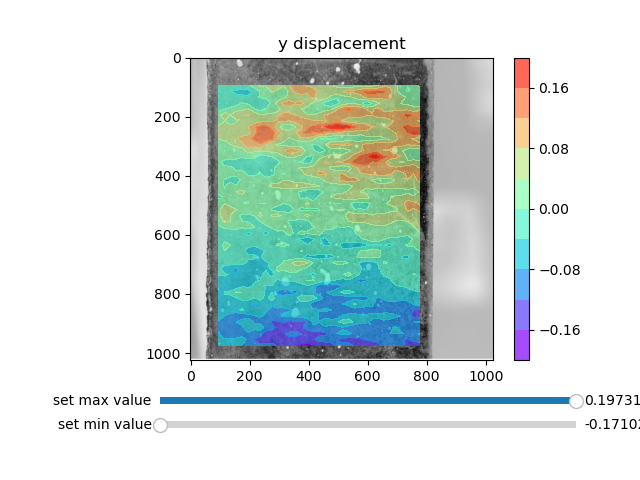

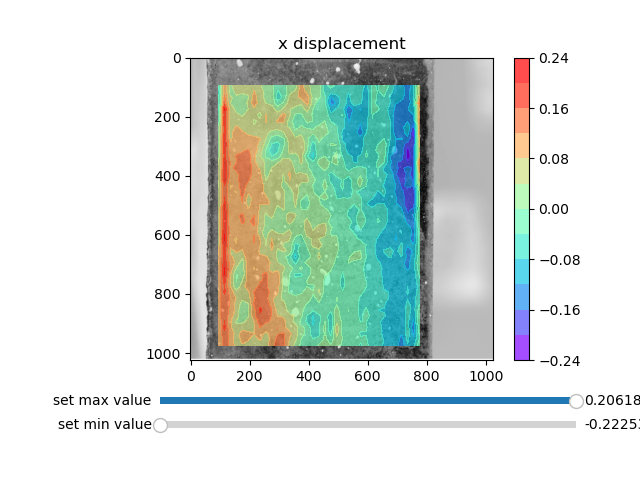

In [10]:
# ======= STANDARD POST-TREATMENT : STRAIN FIELD MAP PLOTTING
# the pydic.grid_list is a list that contains all the correlated grids (one per image)
# the grid objects are the main objects of pydic  
last_grid = pydic.grid_list[1]
last_grid.plot_field(last_grid.disp_x, 'x displacement')
last_grid.plot_field(last_grid.disp_y, 'y displacement')
plt.show()

### Postprocess the strain field

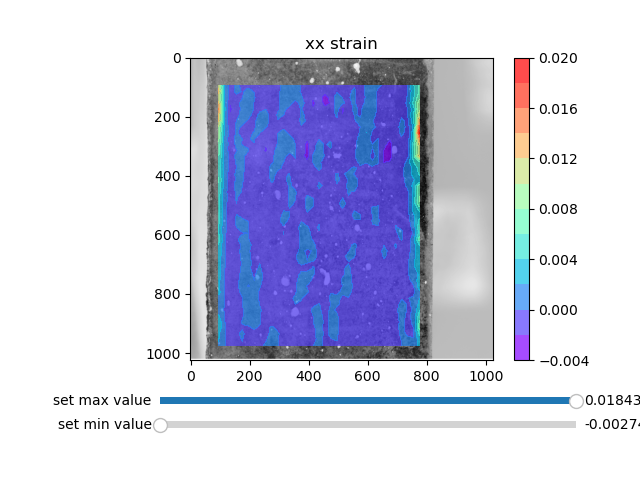

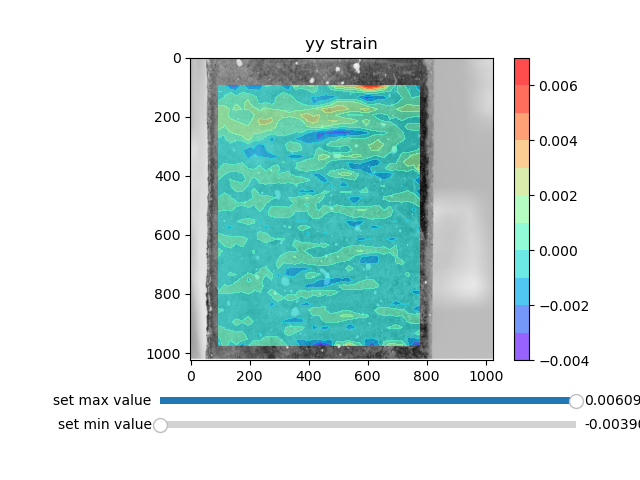

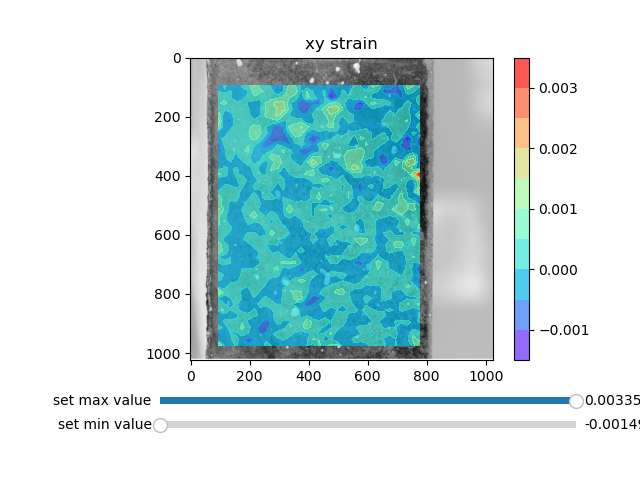

In [12]:
# ======= STANDARD POST-TREATMENT : STRAIN FIELD MAP PLOTTING
# the pydic.grid_list is a list that contains all the correlated grids (one per image)
# the grid objects are the main objects of pydic  
last_grid = pydic.grid_list[2]
last_grid.plot_field(last_grid.strain_xx, 'xx strain')
plt.show()
last_grid.plot_field(last_grid.strain_yy, 'yy strain')
plt.show()
last_grid.plot_field(last_grid.strain_xy, 'xy strain')
plt.show()

### Questions to think about :
- Draw the theoretical strain field of a tensile test specimen and compare it with the experimental one.
- Is the strain state homogeneous ?